# Método de Monte Carlo: introdução

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons<br>

<hr>

Um dos métodos mais populares para simular processos probabilísticos foi proposto por na década de 40 por Stanislaw Ulam, que estava trabalhando no desenvolvimento da bomba atômica, no Los Alamos National Laboratory, nos Estados Unidos. Uma método parecido havia sido proposto por Enrico Fermi no estudo de difusão de neutrons, mas ele não publicou a ideia. A patir do trabalho de Ulam, John von Neumann adaptou o método e programou o  ENIAC (Electronic Numerical Integrator and Computer), que foi o primeiro computador programável, de forma geral, da história. John von Neumann chamou o método de Método de Monte Carlo, que, basicamente, é usado para gerar números aleatórios a partir de uma certa distribuição de probabilidades. O nome se deve à cidade de Monte Carlo, no principado de Mônaco, que possui diversos cassinos. O método de Monte Carlo possui as mais diversas aplicações que vão desde o estudo de emissões nucleares até inferência Bayesiana, sendo, nesse caso, é usada uma adaptação do método chamada Markov Chain Monte Carlo (MCMC).


<img src="motecarlocreators.jpg">

## Geração de números aleatórios

O primeiro passo na simulação de processos estocásticos é a geração de números aleatórios, ou seja, gerar números no intervalo [0,1] onde todos os valores tem a mesma chance de ocorrerem. Maiores detalhes sobre o método que vamos  discutir podem ser vistos na Wikipedia: https://en.wikipedia.org/wiki/Linear_congruential_generator

No método chamada Linear Congruential Generator, nós geramos uma sequência de números pseudo-aleatórios através da relação de recorrência:
$$X_{n+1} = (aX_n + c) \mod m$$
onde $X_0$ é a semente, m, a e c são inteiros maiores do que zero. A sequência obtida satisfaz  $0 \leq X_i \leq m$. Para gerar o número no intervalo [0,1], usamos $$U_n = X_n/m.$$
Vamos considerar uma exemplo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import style
#style.use('dark_background')

def random(Xi, a, c, m):
    Xii = (a*Xi + c)%m
    return Xii

a = 11
c = 0
m = 16
X0 = 1
n = 20 # number of numbers to be generated
Xi = X0
X = [X0]
for i in range(n):
    Xi= random(Xi,a,c,m)
    X.append(Xi)
print(X)
s = np.arange(0, len(X))

plt.figure(figsize=(8,5))
plt.bar(s,X, color = 'gray')
plt.xlabel('n', fontsize = 20)
plt.ylabel('x',fontsize = 20)
plt.savefig('MC1.svg')
plt.show(True)

plt.figure(figsize=(8,5))
plt.hist(X, bins='auto', color = 'gray', histtype='bar', ec='black')  
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.savefig('MC2.svg')
plt.show(True)

[1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1]


<Figure size 800x500 with 1 Axes>

<Figure size 800x500 with 1 Axes>

Notamos que a sequência é periódica, sendo que $[1, 11, 9, 3]$ se repete. Ou seja, não temos um bom gerador de números aleatórios, pois podemos prever o próximo número se descobrir a sequência. Para resolver esse problema, temos o seguinte teorema, demonstrado no livro The Art Of Computer Programming (Donald Knuth).

O gerador pseudo-aleatório linear produz uma sequência aperiódica se as seguintes condições forem sastisfeitas:
* $X_{n+1} = (aX_n + c)\mod m, \quad U_n = X_n/m.$<br>
* Se $q$ é um número primo que divide $m$, então ele divide $b=a-1$.<br>
* Se $m$ é múltiplo de 4, então $b=a-1$ deve ser múltiplo de 4.<br>
* O único inteiro que divide exatamente $m$ e $c$ é  valor um.<br>

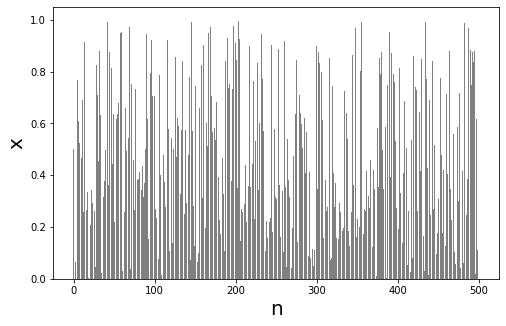

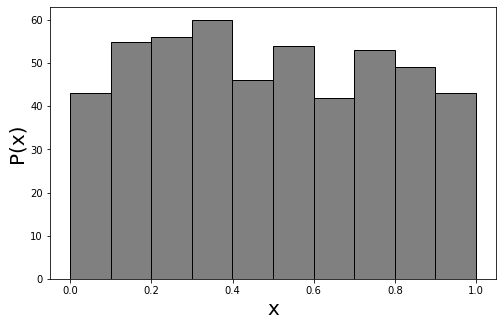

In [2]:
a = 7**5
c = 0
m = 2**31 - 1
X0 = 0.5
n = 500 # number of numbers to be generated
Xi = X0
X = [X0]
for i in range(n):
    Xi= random(Xi,a,c,m)
    X.append(Xi/m)
#print(X)

s = np.arange(0, len(X))
plt.figure(figsize=(8,5))
plt.bar(s,X, color = 'gray')
plt.xlabel('n', fontsize = 20)
plt.ylabel('x',fontsize = 20)
plt.savefig('MC3.svg')
plt.show(True)

plt.figure(figsize=(8,5))
plt.hist(X, bins='auto', color = 'gray', histtype='bar', ec='black')  
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.savefig('MC4.svg')
plt.show(True)

Vemos que agora a frequência em que os números ocorrem é praticamente a mesma.

## Retirando uma bola em uma urna

Para começarmos a enteder a simulação de processos estocásticos, vamos simular a retirada de uma bola de uma urna com reposição, ou seja, a bola retirada é sempre recolocada na urna antes da próxima retirada.

Vamos supor que temos uma urna com 6 bolas brancas e 4 pretas:

In [3]:
urna = ['B','B','B','B','B','B','P','P','P','P']
print('Urna:',urna)

Urna: ['B', 'B', 'B', 'B', 'B', 'B', 'P', 'P', 'P', 'P']


Para selecinarmos uma bola, basta selecionarmos uma posição no vetor e verificar a respectiva bola. Vamos fazer essa retirada 100 vezes e verificar quantas vezes retiramos uma bola branca.

In [4]:
import random # biblioteca para gerar números aleatórios
n = 0 # numero de retiradas de bolas brancas
nsim = 1000 # numero de experimentos
for i in range(0,nsim):
    posicao = random.randint(0,len(urna)-1)
    if(urna[posicao] == 'B'):
        n = n + 1        
print('Fração de vezes que saiu uma bola branca:', n/nsim)

Fração de vezes que saiu uma bola branca: 0.588


In [5]:
# vamos calcular o valor teórica da probabilidade contanto o número de bolas brancas na urna
valor_teorico = 0
for bola in urna:
    if (bola == 'B'):
        valor_teorico = valor_teorico + 1
valor_teorico = valor_teorico/len(urna)
print('Valor teórico da probabilidade:', valor_teorico)

Valor teórico da probabilidade: 0.6


Ou seja, vemos que é próximo do valor teórico: 6/10. Se aumentarmos o número de experimentos, vamos mostrar os resultados em um gráfico.

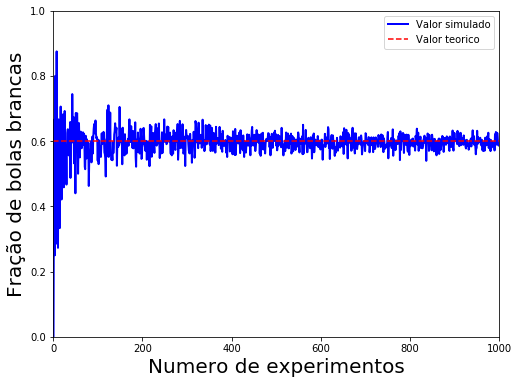

In [6]:
import random # biblioteca para gerar números aleatórios
import numpy as np # biblioteca numérica numpy
import matplotlib.pyplot as plt # biblioteca necessária para mostrar os gráficos


vp = [] # lista que armazena a fração de ocorrências em função do número de simulações nsim
vsim = [] # armazena o número de simulações
Nmax = 1000 # numero maximo de simulacoes
for nsim in np.arange(1,Nmax,1):
    n = 0 # numero de retiradas de bolas brancas
    for i in range(1,nsim):
        posicao = random.randint(0,len(urna)-1)
        if(urna[posicao] == 'B'):
            n = n + 1        
    vp.append(n/nsim)
    vsim.append(nsim)

plt.figure(figsize=(8,6))
plt.plot(vsim, vp, linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
plt.axhline(y=valor_teorico, color='r', linestyle='--', label = 'Valor teorico')
plt.ylabel("Fração de bolas brancas", fontsize=20)
plt.xlabel("Numero de experimentos", fontsize=20)
plt.xlim([0.0, Nmax])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True) 

Ou seja, vemos que o valor converge para a probabilide esperada.

> **Exercício**: Considere agora uma urna com 14 bolas brancas e 6 pretas. Repita o procedimento acima e verifique se a estimação é correta.

## Lançando uma moeda

Vamos simular o lançamento de uma moeda. Para isso, precisamos definir uma regra para escolher se saiu cara ou coroa. Para entendermos melhor como definir essa regra, notem que no exemplo anterior, ordenamos as bolas em um vetor. Essa ordenação não faz a menor diferença no exemplo anterior, pois a não consideramos. Se consideramos a ordenação, a regra poderia ser: se a posição no vetor é menor ou igual a 6, então a bola é branca. Caso contrário, é preta. Ou seja, podemos usar essa regra para definir qual dos valores vamos selecionar.

No caso de uma moeda, vamos supor que $p$ é a chance de sair cara. Então, a regra pode ser: se o número sorteado em [0,1] for menor do que $p$, então saiu cara. Caso contrário, saiu coroa. Vamos realizar um exmperimento.

In [7]:
p = 0.6 # probabilidade de sair cara

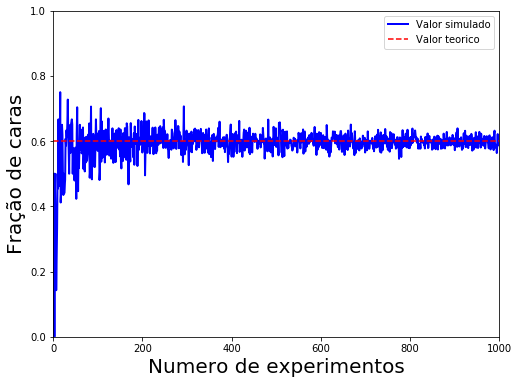

In [8]:
vp = [] # lista que armazena a fração de ocorrências em função do número de simulações nsim
vsim = [] # armazena o número de simulações
Nmax = 1000 # numero maximo de simulacoes
for nsim in np.arange(1,Nmax,1):
    nhead = 0 # numero de caras
    for i in range(1,nsim):
        if(np.random.uniform() <= p):
            nhead = nhead + 1        
    vp.append(nhead/nsim)
    vsim.append(nsim)

plt.figure(figsize=(8,6))
plt.plot(vsim, vp, linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
plt.axhline(y=p, color='r', linestyle='--', label = 'Valor teorico')
plt.ylabel("Fração de caras", fontsize=20)
plt.xlabel("Numero de experimentos", fontsize=20)
plt.xlim([0.0, Nmax])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True) 

> **Exercício**: Varie a probabilidade de sair cara e verifique como muda o gráfico acima.

## Calculando o valor de $\pi$

Para calcular o valor e $\pi$, vamos considerar um quadrado de raio 2R que contém um círculo de raio R, conforme a figura abaixo.

<img src="estimating-pi-monte-carlo-method.png">

Selecionando posições aleatórias nessa região e incluindo pontos, conforme exemplificado na figura, temos que alguns pontos caem dentro do círculo (pontos vermelhos), enquanto que outros ficam fora (pontos em azul). Inserindo um grande número de pontos de forma aleatória, temos que:<br>
**o número de pontos dentro do círculo/número de pontos gerados = área do círculo/área do quadrado.**<br>
Ou seja, o valor de $\pi$:<br>
o número de pontos dentro do círculo/número de pontos gerados = $\pi R^2$/$4R^2$<br>
Logo:<br>
$\pi$ = 4* o número de pontos dentro do círculo/ número de pontos gerados

In [9]:
n = 1000
count_inside = 0
for i in np.arange(0,n):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    if( x**2 + y**2 < 1):
        count_inside = count_inside + 1
pi = 4*count_inside/n
print("Value of pi:", pi)

Value of pi: 3.156


Podemos analisar como essa aproximação muda com o número de pontos gerados.

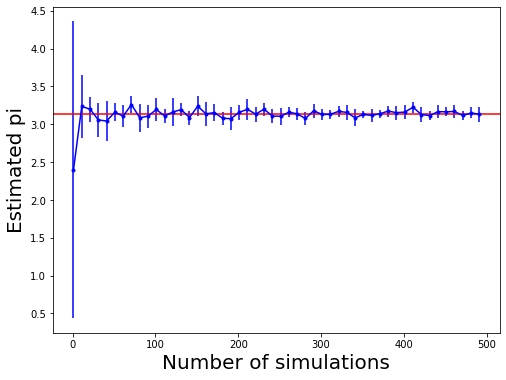

In [10]:
N = 500
vpi = []
vpi_std = []
vn = []
for n in np.arange(1,N, 10):
    aux = []
    for s in np.arange(0,10):
        count_inside = 0
        for i in np.arange(0,n):
            x = np.random.uniform(0,1)
            y = np.random.uniform(0,1)
            if( x**2 + y**2 < 1):
                count_inside = count_inside + 1
        pi = 4*count_inside/n
        aux.append(pi)
    vpi.append(np.mean(aux))
    vpi_std.append(np.std(aux))
    vn.append(n)

plt.figure(figsize=(8,6))
#plt.plot(vn, vpi, linestyle='-', color="blue", linewidth=2.5)
plt.errorbar(vn, vpi, yerr=vpi_std, fmt='.-b')
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel("Number of simulations", fontsize=20)
plt.ylabel("Estimated pi", fontsize=20)
plt.show(True)  

> **Exercício:** Verifique quantas simulações são necessárias para você obter um valor que seja 99% próximo de $\pi$. Dica: use o valor conhecido de $\pi$ e faça um gráfico da diferença entre o valor obtido e o real em função do número de pontos sorteados.

## Semente do gerador de número aleatórios

Notem que a semente gera uma sequência de número aleatórios e a sequência se repete quando reiniciamos a semente.

In [11]:
import numpy as np
print("Primeira sequencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)
print('\n')

print("Segunda sequencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)

Primeira sequencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


Segunda sequencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


Se não reinicarmos a semente:

In [12]:
import numpy as np
print("Primeira sequencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)
print('\n')

print("Segunda sequencia:")
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)

Primeira sequencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


Segunda sequencia:
0.5542275911247871
0.3521319540266141
0.18189240266007867
0.7856017618643588
0.9654832224119693
0.2323536618147607
0.08356143366334368
0.6035484222912185
0.7289927572876178
0.2762388284972628


> **Para pensar:** Como você verificaria se esse números gerados são realmente aleatórios?